# Introduction to Deep Learning

In [ ]:
df.describe()

Points to be kept in mind:
	1.	If the target variable is categorical, do Label Encoding for the target variable.
	2.	Use flatten layer only when your data is 3D (means the shape of X_train is something like (6000,28,28). If the dataset is 2D, don’t use flatten layer.
	3.	Early stopping to be used only when the model with validation split is selected for further hyper parameter tuning.
	4.	If the dataset is 3D, then only adapt will be used for normalisation. If the dataset is 2D, do the normalisation normally (no need of adapt then).

In [ ]:
## PRe-processing
# Drop null values
bank.dropna(inplace=True)

# Remove two columns name is 'default' and 'loan'
bank=bank.drop(['default', 'loan'], axis=1)

# get names of indexes for which
# column duration has value < 60
index_names = bank[ bank['duration'] < 60 ].index
# drop these row indexes
# from dataFrame
bank.drop(index_names, inplace = True)


# count the number of occurrences of each job type
job_counts = bank["job"].value_counts()
# filter out the job types that have a count less than 2
jobs_to_drop = job_counts[job_counts < 2].index.tolist()
# drop the rows that correspond to the filtered job types from the original DataFrame
bank.drop(bank[bank["job"].isin(jobs_to_drop)].index, inplace=True)

# print the modified DataFrame
print(bank)


from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder object
le = LabelEncoder()
# Encode the 'job', 'marital', 'education', 'housing', 'contact', 'month', 'poutcome', and 'y' columns
bank['job'] = le.fit_transform(bank['job'])
bank['marital'] = le.fit_transform(bank['marital'])
bank['education'] = le.fit_transform(bank['education'])
bank['housing'] = le.fit_transform(bank['housing'])
bank['contact'] = le.fit_transform(bank['contact'])
bank['month'] = le.fit_transform(bank['month'])
bank['poutcome'] = le.fit_transform(bank['poutcome'])
bank['y'] = le.fit_transform(bank['y'])
bank

#checking for null values
bank.isnull().sum()

#filling null values
#house['City'].fillna(method='ffill',inplace=True)
#house['Facing'].fillna(value="North",inplace=True)
#df[column].fillna(value=df[column].mean(), inplace=True)

#Target
y=bank['y']
# Features
X=bank.drop(['y'],axis=1)


#Normalization of features if required
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X_1)
X_scaled

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

df = pd.read_csv('/airlines_customer.csv')

OR

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [ ]:
from google.colab import files
d=files.upload()
import io
data=pd.read_csv(io.BytesIO(d['marketing_campaign (1).csv']))

In [ ]:
# EDA:
df['booking_status'].value_counts()
df.describe()
# DATA SUMMARY:

def summary(df):
    print(f'data shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['data type'])
    summ['#missing'] = df.isnull().sum().values * 100
    summ['%missing'] = df.isnull().sum().values / len(df)
    summ['#unique'] = df.nunique().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['min'] = desc['min'].values
    summ['max'] = desc['max'].values
    summ['first value'] = df.loc[0].values
    summ['second value'] = df.loc[1].values
    summ['third value'] = df.loc[2].values
    
    return summ
    pd.set_option('display.max_rows', None)
summary(df)

# handling unique values:
unique_stats = df.nunique().reset_index().rename(columns ={'index': 'feature', 0: 'nunique'})
unique_stats[unique_stats['nunique'] == 1]

# eda:

plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=False);

#freq:
plt.hist(x=data['Recency'],edgecolor='white',color='#245D')
plt.title('Distribution of their last visit')
plt.xlabel('Last Visit (In days)')
plt.ylabel('Frequency')

fig , ax = plt.subplots()
sizes = data['Complain'].value_counts() 
labels = 'No compain', 'Complain' 
ax.pie(sizes,labels=labels,autopct='%1.1f%%',shadow=True, startangle=45,wedgeprops={'edgecolor':'black'},
        colors=['#3185FC','#F5F5F5'])
ax.axis('equal')
ax.set_title('Complains raised by the customer')


plt.figure(figsize=(16,5))
plt.title(f'Customers income boxplot')
ax = sns.boxplot(data['Income'], color='green')
plt.show()



# shuffling dta:
from sklearn.utils import shuffle
df = shuffle(df)

# deleting duplicate:
data.duplicated().sum()
data[data.duplicated(keep=False)].sort_values(by='Income')
data.drop_duplicates(inplace=True)
data.duplicated().sum()

data['Marital_Status'].value_counts()

data_dummies=pd.get_dummies(data1[['Age_Group','Partner','Education_Level']])

https://colab.research.google.com/drive/12X4vfzZXGR8fmjl1ajQUFZK_YKvz2aUG#scrollTo=HAYs2yY8p-C6

**SESSION** **2**

### Binary Classification using Multi-layer Perceptron

A perceptron is the simplest possible neural network, an algorithm for supervised learning of Binary Classifiers

A perceptron is a single layer neural network and a multi-layer perceptron is called Neural Network

The Perceptron consists of 4 parts:
1. Input Values or one Input layer
2. Weights and Bias
3. Net Sum
4. Activation fnc


#### CODE:

###### STEP 1: Accessing the dataset

In [ ]:
# Importing the libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import tensorflow as tf

In [ ]:
# Accessing the dataset:
from sklearn.datasets import make_blobs
X,y=make_blobs(n_samples=400,n_features=2,centers=2,random_state=100) # s_samples= datapoints, centers= how many  centers we want

###### STEP 2: Visualisation of the dataset

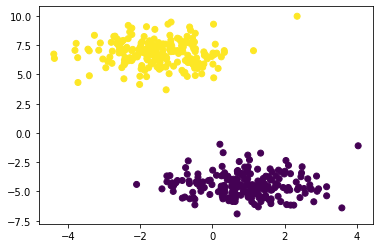

In [ ]:
# Visualisation of the dataset
plt.scatter(X[:,0],X[:,1],c=y);

In [ ]:
# check if they are seperated or not
# yes, they are seperated

###### STEP 3: SPLITTING INTO TRAIN AND TEST

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((320, 2), (80, 2), (320,), (80,))

###### STEP 4: BUILDING THE MODEL

In [ ]:
model_1=tf.keras.Sequential() # it is sequential model, data is supposed to move one after the other
#add model layers:
model_1.add(tf.keras.layers.Dense(8,activation='relu')) # dense means densely connected with the features # purpose of activation- weighted result pass through is to give the final output
model_1.add(tf.keras.layers.Dense(1,activation='sigmoid'))
# relu is used here to make the process more effective, faster

* Sequential is the easiest way to build a model in Keras. It allows you to build a model layer by layer. Each layer has weights that correspond to the layer the follows it.

* We use the ‘add()’ function to add layers to our model. 

* ‘Dense’ is the layer type. Dense is a standard layer type that works for most cases. In a dense layer, all nodes in the previous layer connect to the nodes in the current layer.

* The first input layer has 8 nodes and the output layer has 1 node, increasing the number of nodes, increases the model capacity

*  An activation function allows models to take into account nonlinear relationships. In the first layer we are using Relu= Rectified Linear Activation

The ReLU activation function is commonly used in neural networks to introduce non-linearity into the model. Which is important for capturing complex patterns in the data. It is a simple and computationally efficient activation function that sets any negative input values to zero and leaves positive input values unchanged.

In this model: 
The ReLU activation function is applied to each of these weighted sums separately, effectively turning off any negative values and allowing the positive values to pass through unchanged.

By introducing non-linearity in this way, the neural network can learn to model complex relationships between the input features and the output classes, making it more powerful and accurate in its predictions.





The sigmoid function is often used in binary classification problems, where the output is a probability score between 0 and 1.

In [ ]:
# Overall, this model is a simple binary classification model that takes input data and outputs a single probability score indicating the likelihood of the input belonging to a particular class. 

###### STEP 5: COMPILING THE MODEL

Next, we need to compile our model. Compiling the model takes two parameters: optimizer and loss.

* The optimizer controls the learning rate. We will be using ‘adam’ as our optmizer. Adam is generally a good optimizer to use for many cases. The adam optimizer adjusts the learning rate throughout training.

* The learning rate determines how fast the optimal weights for the model are calculated. A smaller learning rate may lead to more accurate weights (up to a certain point), but the time it takes to compute the weights will be longer.

* Binary Cross Entropy is the negative average of the log of corrected predicted probabilities. Log loss function

In [ ]:
from tensorflow.python import metrics
model_1.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy']) #optimizing the gradient decent process faster

###### STEP 6: TRAINING THE MODEL

Epoch 1/50
10/10 [==============================] - 1s 3ms/step - loss: 2.2273 - accuracy: 0.0000e+00
Epoch 2/50
10/10 [==============================] - 0s 2ms/step - loss: 2.0795 - accuracy: 0.0000e+00
Epoch 3/50
10/10 [==============================] - 0s 2ms/step - loss: 1.9363 - accuracy: 0.0000e+00
Epoch 4/50
10/10 [==============================] - 0s 3ms/step - loss: 1.8001 - accuracy: 0.0000e+00
Epoch 5/50
10/10 [==============================] - 0s 2ms/step - loss: 1.6714 - accuracy: 0.0031
Epoch 6/50
10/10 [==============================] - 0s 2ms/step - loss: 1.5418 - accuracy: 0.0063
Epoch 7/50
10/10 [==============================] - 0s 2ms/step - loss: 1.4270 - accuracy: 0.0063
Epoch 8/50
10/10 [==============================] - 0s 2ms/step - loss: 1.3140 - accuracy: 0.0063
Epoch 9/50
10/10 [==============================] - 0s 3ms/step - loss: 1.2106 - accuracy: 0.0094
Epoch 10/50
10/10 [==============================] - 0s 2ms/step - loss: 1.1114 - accuracy: 0.0125
Epo

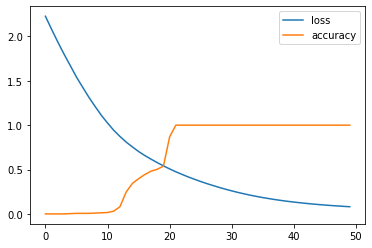

In [ ]:
tf.random.set_seed(100)
history=model_1.fit(X_train,y_train,epochs=50) # epochs= number of iterations
hist=pd.DataFrame(history.history)
hist.plot();

The number of epochs is the number of times the model will cycle through the data. The more epochs we run, the more the model will improve, up to a certain point. After that point, the model will stop improving during each epoch. In addition, the more epochs, the longer the model will take to run. To monitor this, we will use ‘early stopping’.

In [ ]:
# When the model is changing with every epoch, the history is kept so that we can create a dataframe and evaluate later

In [ ]:
# one epochs is 320 (training data) datapoint going to and fro the whole nueral network, 
# the error between the actual and expected value is send back(fro) # to minimize error
# The value of epoch is 50, so this will happen 50 time, 50*320

In [ ]:
# by default the batch size is 32, 320 datapoint are there so 10/10 is there
# you can also change the batch size

###### STEP 7: MODEL SUMMARY

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (32, 8)                   24        
                                                                 
 dense_1 (Dense)             (32, 1)                   9         
                                                                 
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Output shape is in the format: (batch_size, input_shape)

In [ ]:
# Param = 24 is calculated by: (n_features * 8) + 8.
# Here number of features (320,2) is the shape = 2 
# = (2*8 + 8) = 24

In [ ]:
# param =9 is calculated by 1(neuron)*8(input/output of first layer) +1(bias)

###### STEP 8: PLOTTING THE MODEL

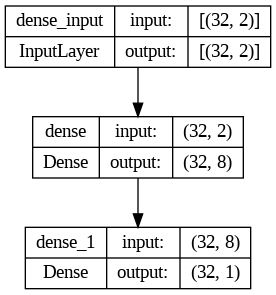

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_1,show_shapes=True)

###### STEP 9: PREDICTION

In [ ]:
model_1.predict(X_test)

3/3 [==============================] - 0s 3ms/step


array([[0.9357379 ],
       [0.04618797],
       [0.9470904 ],
       [0.08001955],
       [0.91214633],
       [0.05222229],
       [0.07262328],
       [0.04788824],
       [0.01524673],
       [0.8905528 ],
       [0.9233624 ],
       [0.872234  ],
       [0.8850645 ],
       [0.84056664],
       [0.02348355],
       [0.8811938 ],
       [0.03972413],
       [0.8964892 ],
       [0.02206366],
       [0.96575785],
       [0.8831256 ],
       [0.01592639],
       [0.8570025 ],
       [0.1034906 ],
       [0.9095711 ],
       [0.882573  ],
       [0.03606113],
       [0.07697432],
       [0.06226514],
       [0.02691287],
       [0.8531643 ],
       [0.93899137],
       [0.03975785],
       [0.03974066],
       [0.91549814],
       [0.02694448],
       [0.9219561 ],
       [0.1842957 ],
       [0.9488243 ],
       [0.02251508],
       [0.8596807 ],
       [0.940298  ],
       [0.05136172],
       [0.02773234],
       [0.8959487 ],
       [0.03382224],
       [0.15819974],
       [0.931

In [ ]:
# test data had 80 points, 32 is the default batchsize, so 3*32= 96, 80 points will fit in 3/3

In [ ]:
## PRe-processing
# Drop null values
bank = bank.dropna()

# Remove two columns name is 'default' and 'loan'
bank=bank.drop(['default', 'loan'], axis=1)

# get names of indexes for which
# column duration has value < 60
index_names = bank[ bank['duration'] < 60 ].index
# drop these row indexes
# from dataFrame
bank.drop(index_names, inplace = True)


from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder object
le = LabelEncoder()
# Encode the 'job', 'marital', 'education', 'housing', 'contact', 'month', 'poutcome', and 'y' columns
bank['job'] = le.fit_transform(bank['job'])
bank['marital'] = le.fit_transform(bank['marital'])
bank['education'] = le.fit_transform(bank['education'])
bank['housing'] = le.fit_transform(bank['housing'])
bank['contact'] = le.fit_transform(bank['contact'])
bank['month'] = le.fit_transform(bank['month'])
bank['poutcome'] = le.fit_transform(bank['poutcome'])
bank['y'] = le.fit_transform(bank['y'])
bank

#checking for null values
bank.isnull().sum()

#filling null values
#house['City'].fillna(method='ffill',inplace=True)
#house['Facing'].fillna(value="North",inplace=True)
#df[column].fillna(df[column].mean(), inplace=True)

#Target
y=bank['y']
# Features
X=bank.drop(['y'],axis=1)


#Normalization of features if required
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X_1)
X_scaled

https://colab.research.google.com/drive/12X4vfzZXGR8fmjl1ajQUFZK_YKvz2aUG?usp=sharing

medium.com/@andrewBas

https://github.com/kickbuttowski0007/dl_duh

**SESSION** **3**